In [3]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
from sklearn.datasets.samples_generator import make_blobs


/Users/bastienbrunod/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
def pca(data):
    data = np.transpose(data)
    print data.shape
    data_cov = np.cov(data)
    w, v = np.linalg.eig(data_cov)
    # -> put some real value: 
    w = np.real(w)
    v = np.real(v)
    idx = (np.argsort(np.abs(w))[::-1])
    values = w[idx]
    vectors = v[idx]
    return values, vectors

#def plot(data):
    
    

In [151]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train = X_train.reshape((X_train.shape[0], 28*28))

import mnist

images = mnist.train_images()
x = images.reshape((images.shape[0], images.shape[1] * images.shape[2]))

values, vectors = pca(x)

vectors = vectors[:2]
print vectors
vectors = np.transpose(vectors)

X_train = (X_train)
print(X_train.shape)
print(vectors.shape)


matrical_product = np.dot(X_train,vectors)


(784, 60000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)
(784, 2)


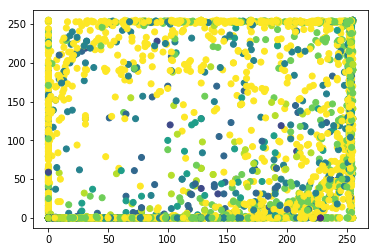

In [152]:
#for i in  range(len(matrical_product[:10000])):
plt.scatter(matrical_product[:,0],matrical_product[:,1],c = y_train)
show()

/Users/bastienbrunod/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


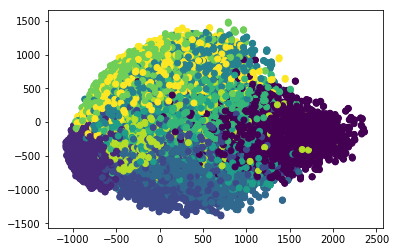

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.decomposition import RandomizedPCA
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
pca = RandomizedPCA(n_components=2)


X_transformed = pca.fit_transform(X_train)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train)
show()

In [ ]:
labels_color = []
for el in y_train:
    if el ==0:
        labels_color.append("blue")
    elif el ==1:
        labels_color.append("red")
    elif el ==2:
        labels_color.append("pink")
    elif el ==3:
        labels_color.append("grey")
    elif el ==4:
        labels_color.append("violet")
    elif el ==5:
        labels_color.append("yellow")
    elif el ==6:
        labels_color.append("lime")
    elif el ==7:
        labels_color.append("mintcream")
    elif el ==8:
        labels_color.append("cyan")
    elif el ==9:
        labels_color.append("gold")
        
labels = [1,]
